In [ ]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Llave para generación aleatoria con JAX
key = jax.random.key(0)

# Número de puntos a generar
n = 300

# Generamos valores de entrada (x) entre -10 y 10
x = jnp.linspace(-10.0, 10.0, n)

# Valores reales para la intersección y la pendiente de la recta
inter_true = jnp.array([2.3])  # Intercepto
pendi_true = jnp.array([5.5])  # Pendiente

# Parámetros del ruido (normal con media baja y desviación considerable)
mean = 0.0001
std = 1.9

# Generamos ruido aleatorio con la llave creada
noise = mean + std * jax.random.normal(key, shape=n)


<ipython-input-23-d4084e1b47d9>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


,x,y
0,-10.000000,-49.616882
1,-9.933110,-48.484005
2,-9.866220,-52.787945
3,-9.799332,-51.745598
4,-9.732442,-50.893761


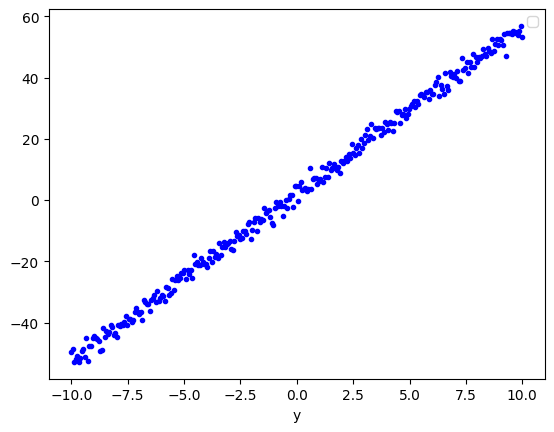

In [ ]:
# Ecuación de la recta con ruido: y = mx + b + ruido
y = pendi_true*x + inter_true + noise

# Gráfico de dispersión de los datos generados
plt.scatter(x, y, marker='.', c='blue')
plt.xlabel('x')
plt.xlabel('y')
plt.legend()

# Se crea un diccionario con los valores x e y
dict_ = {'x': x, 'y': y}

# Se convierte en un DataFrame de pandas
df = pd.DataFrame(dict_)

# Vista previa del DataFrame (primeras 5 filas)
df.head()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Función para particionar y batchear datos
def get_dataset_partitions(X, y, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, batch_size=30):
    # Verificación de proporciones
    assert (train_split + val_split + test_split) == 1, "Las proporciones deben sumar 1"

    # Conversión a arreglos de JAX
    X, y = jnp.array(X), jnp.array(y)

    # Barajado de datos si es necesario
    if shuffle:
        indices = np.arange(len(X))
        np.random.seed(12)
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]

    #  División en entrenamiento, validación y prueba
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(val_split + test_split), random_state=12)
    # Se divide el conjunto temporal en validación y prueba
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_split / (val_split + test_split)), random_state=12)

    # Función interna para generar batches
    def batch_data(X, y, batch_size):
        num_batches = len(X) // batch_size
        return [(X[i * batch_size:(i + 1) * batch_size], y[i * batch_size:(i + 1) * batch_size]) for i in range(num_batches)]

    # Creación de datasets en batches
    train_ds = batch_data(X_train, y_train, batch_size)
    val_ds = batch_data(X_val, y_val, batch_size)
    test_ds = batch_data(X_test, y_test, batch_size)

    return train_ds, val_ds, test_ds

In [ ]:
# Ejecución de la función con proporciones personalizadas
train_ds, val_ds, test_ds = get_dataset_partitions(x, y, train_split=0.7, val_split=0.15, test_split=0.15)

# Cantidad de batches en cada conjunto
print("Train batches:", len(train_ds))
print("Validation batches:", len(val_ds))
print("Test batches:", len(test_ds))

Train batches: 7
Validation batches: 1
Test batches: 1


### Entrenamiento

In [ ]:
w = jax.random.normal(key=key, shape=(1))  # Peso inicial aleatorio (W)
b = jax.random.normal(key=key, shape=(1))  # Sesgo inicial aleatorio (b)


In [ ]:
def linear(y_pred):
    return y_pred


$$y_{pred} = W\cdot x + b$$

In [ ]:
import jax.nn as jnn

def output(w, b, x, activation=linear):
    y_pred = jnp.add(jnp.multiply(w, x), b)  # y_pred = w * x + b
    return activation(y_pred)               # Aplica la activación (por defecto: lineal)


In [ ]:
def loss_mse(y_pred, y):
    return jnp.mean(jnp.square(y_pred-y))

In [ ]:
Epocas = 45  # Número de épocas (iteraciones sobre el dataset completo)
loss_hist = []  # Historial de pérdida en entrenamiento
loss_hist_val = []  # Historial de pérdida en validación
loss_batch = []  # Historial de pérdida por lote
learning_rate = 0.008  # Tasa de aprendizaje (qué tan grandes son los pasos del descenso de gradiente)


In [ ]:
def loss_fn(params):
    w_, b_ = params  # Desempaqueta los parámetros
    y_pred = output(w_, b_, x)  # Calcula la predicción
    return loss_mse(y_pred, y)  # Retorna la pérdida


In [ ]:
for st in range(Epocas):  # Repetimos el entrenamiento por el número total de épocas
    loss_batch = []  # Aquí almacenamos la pérdida (loss) de cada batch de entrenamiento


    for dsx, dsy in train_ds:  # Recorremos cada batch (lote) de datos de entrenamiento
        d1_dw, d1_db = jax.grad(loss_fn)([w, b])  # Calculamos los gradientes respecto a w y b
        # Actualizar pesos y bias
        w = w - learning_rate * dl_dw
        b = b - learning_rate * dl_db
        # Calcular loss del batch
        y_pred = output_(w, b, dsx)
        loss = loss_mse(y_pred, dsy)
        loss_batch.append(loss.item())

    # Validación
        loss_v = []  # Lista para almacenar la pérdida de validación

    for dsx_val, dsy_val in val_ds:  # Recorremos los batches de validación
        y_pred_val = output(w, b, dsx_val)  # Obtenemos predicciones
        loss_batch_val = loss_mse(y_pred_val, dsy_val)  # Calculamos la pérdida
        loss_v.append(loss_batch_val.item())  # Guardamos la pérdida


    # Cálculo de loss promedio por época
    loss_val = np.mean(loss_v)  # Promedio de pérdida de validación
    loss_epoc = np.mean(loss_batch)  # Promedio de pérdida de entrenamiento

    loss_hist.append(loss_epoc)  # Guardamos pérdida de entrenamiento
    loss_hist_val.append(loss_val)  # Guardamos pérdida de validación


    if st % 10 == 0:
        print(f'epoch: {st}; loss_mse_train: {loss_epoc}; loss_mse_validation: {loss_val}; w: {w}; b: {b}')

epoch: 0; loss_mse_train: 15.56967111996242; loss_mse_validation: 5.027972221374512; w: [5.455425]; b: [1.6938113]
epoch: 10; loss_mse_train: 3.0584498132978166; loss_mse_validation: 4.27962589263916; w: [5.473013]; b: [2.0967143]
epoch: 20; loss_mse_train: 3.0212859766823903; loss_mse_validation: 4.134316921234131; w: [5.473013]; b: [2.2269878]
epoch: 30; loss_mse_train: 3.0172857557024275; loss_mse_validation: 4.094594955444336; w: [5.473013]; b: [2.2691097]
epoch: 40; loss_mse_train: 3.0168303762163435; loss_mse_validation: 4.082509517669678; w: [5.473013]; b: [2.2827296]


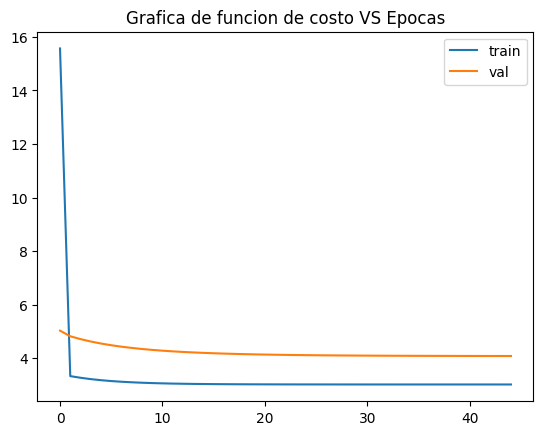

In [ ]:
plt.plot(loss_hist,label='train')
plt.plot(loss_hist_val,label='val')
plt.title('Grafica de funcion de costo VS Epocas')
plt.legend();

In [ ]:
loss_t = []  # Lista para guardar pérdidas por batch en test
x_test_t = []
y_test_t = []

for dsx_test, dsy_test in test_ds:  # Recorremos los datos de prueba
    y_pred_test = output(w, b, dsx_test)  # Predicción del modelo
    loss_batch_test = loss_mse(y_pred_test, dsy_test)  # Pérdida del batch

    loss_t.append(loss_batch_test.item())  # Guardamos la pérdida
    x_test_t.append(dsx_test)  # Guardamos datos de entrada (opcional)
    y_test_t.append(dsy_test)  # Guardamos etiquetas verdaderas (opcional)

print(loss_t)
loss_test = jnp.mean(np.asarray(loss_t))  # Pérdida promedio
print("Funcion de costo para datos prueba:", loss_test)

[Array(3.1577797, dtype=float32)]
Funcion de costo para datos prueba: 3.1577797


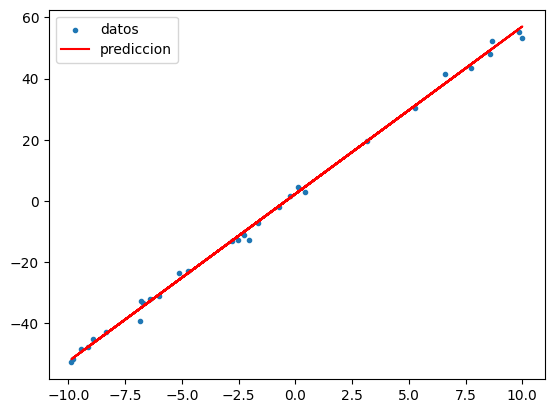

In [ ]:
# Predicción de la regresión
x_test = np.concatenate(x_test)  # Concatenamos los datos de entrada de prueba
y_test = np.concatenate(y_test)  # Concatenamos las etiquetas verdaderas

# Mostramos en un gráfico de dispersión los puntos reales
plt.scatter(x_test, y_test, marker='.', label='datos')

# Dibujamos la línea de predicción del modelo entrenado
plt.plot(x_test, x_test*w + b, color='red', label='prediccion')

plt.legend()  # Mostramos la leyenda del gráfico


<ipython-input-37-fe0c876fc301>:1: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  data_x = jax.random.uniform(key=key,


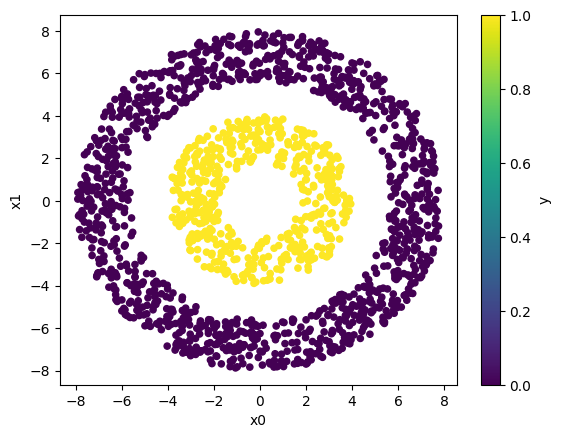

In [ ]:
# # Creamos 5000 puntos con coordenadas (x0, x1) entre -10 y 10
data_x = jax.random.uniform(key=key,
    shape=(5000,2), minval=-10, maxval=10, dtype=jnp.float64)

# Etiquetado según distancia radial al origen (parecido a círculos concéntricos)
def label_circle(x,y):
    if  1*np.sqrt(10)<x**2+y**2<= 5*np.sqrt(10):
        return  1
    elif  20*np.sqrt(10)>=x**2+y**2>= 10*np.sqrt(10):
        return 0
    else:
        return 2

# Devuelve las coordenadas al cuadrado (podría ser para ingeniería de características)
def squared_circle(x,y):
    return x**2, y**2

# Convertimos los datos a un DataFrame para facilitar la manipulació
df =pd.DataFrame(data_x,columns=['x0','x1'])

# Aplicamos la función de etiquetado a cada fila
df['y'] =df.apply(lambda x: label_circle(x['x0'],x['x1']), axis=1)

# Aplicamos la transformación cuadrada como nuevas columnas 'x0^2' y 'x1^2'
df[['x02','x12']] =df.apply(lambda x: squared_circle(x['x0'],x['x1']), axis=1, result_type="expand")

# Mostramos solo los datos con etiqueta distinta de 2
df=df[df['y']!=2]

# Gráfico de dispersión con color según etiqueta
df.plot.scatter(x='x0',y='x1', c='y',colormap='viridis');

In [ ]:
# Función para convertir entradas y etiquetas a float64 (JAX necesita tipos explícito
def preprocess(x,y):
    return x.astype(jnp.float64), y.astype(jnp.float64)

# Separación del DataFrame en características (X) y etiquetas (y)
pandas_dataset_X = jnp.array(df[['x0', 'x1']].values)
pandas_dataset_y = jnp.array(df['y'].values)

# Mezclamos el orden de los datos (esto se suele hacer antes de dividir en train/test)
len_df = len(pandas_dataset_X)
np.random.permutation(len_df)

# Convertimos los datos a tipo JAX (float64)
X_preprocessed, y_preprocessed = preprocess(jnp.array(pandas_dataset_X), jnp.array(pandas_dataset_y))

/usr/local/lib/python3.11/dist-packages/jax/_src/numpy/array_methods.py:122: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


In [ ]:
BATCH=50
train_data_class, val_data_class, test_data_class = get_dataset_partitions(X_preprocessed, y_preprocessed, train_split=0.8, val_split=0.1, test_split=0.1, batch_size=BATCH)

In [ ]:
# Salida de red neuronal (prediccion y_pred)
def output_(w, b, x, activation=jnn.sigmoid):
    y_pred = jnp.add(jnp.dot(jnp.power(x,2).astype(jnp.float64), w), b)
    return activation(y_pred)

# Cálculo de funcion de costo, clasificación => cross entropy
def cross_entropy_loss(y_pred, y_true):
    ### Cross entropy
    y_pred = jnp.clip(y_pred, 1e-9, 1.)
    return -jnp.mean(jnp.sum(y_true * jnp.log(y_pred+1e-9)+(1. - y_true) * jnp.log(1.-y_pred+1e-9)))/len(y_pred)

# Definición de exactitud
def accuracy(y_pred, y_true):
    correct_prediction = jnp.equal(jnp.argmax(y_pred, 1), y_true.astype(jnp.float64))
    return jnp.mean(correct_prediction.astype(jnp.float64))

In [ ]:
def BinaryCrossEntropy(y_pred, y_true):
  return cross_entropy_loss(y_pred, y_true)

In [ ]:
Epocas=100
loss_hist = []
loss_hist_val = []
loss_batch =[]
acc_batch =[]
learning_rate=0.001

In [ ]:
w = jax.random.normal(key=key, shape=(2, 1), dtype=jnp.float64)
b = jax.random.normal(key=key, shape=(1), dtype=jnp.float64)

<ipython-input-44-429a41068324>:1: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  w = jax.random.normal(key=key, shape=(2, 1), dtype=jnp.float64)
<ipython-input-44-429a41068324>:2: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'>  is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  b = jax.random.normal(key=key, shape=(1), dtype=jnp.float64)


In [ ]:
# Función para calcular la pérdida total
# Entrada: pesos w, bias b, datos de entrada dsX, etiquetas verdaderas dsY
def compute_loss(w, b, dsX, dsY):
    # Paso hacia adelante (forward pass): cálculo de la predicción del modelo
    y_pred = output_(w, b, dsX)
    # Cálculo de la pérdida con entropía cruzada entre la predicción y la etiqueta verdadera
    return cross_entropy_loss(y_pred, dsY)


# Bucle principal de entrenamiento que recorre todas las épocas
for st in range(Epocas):

    # Iteramos sobre los lotes (batches) del conjunto de entrenamiento
    for dsX, dsY in train_data_class:
        # Paso hacia adelante: obtener predicción para el lote actual
        y_pred = output_(w, b, dsX)

        # Cálculo de la pérdida del lote
        loss = cross_entropy_loss(y_pred, dsY)

        # Cálculo del gradiente de la función de pérdida respecto a w y b
        grads = jax.grad(compute_loss, argnums=(0, 1))(w, b, dsX, dsY)
        dL_dw, dL_db = grads  # Desempaquetamos los gradientes

        # Actualización de parámetros usando descenso por gradiente
        w = w - learning_rate * dL_dw
        b = b - learning_rate * dL_db

        # Guardamos la pérdida del lote para monitorear
        loss_batch.append(loss)

        # Calculamos la precisión para el lote actual
        acc = accuracy(y_pred, dsY)

        # Guardamos la precisión del lote
        acc_batch.append(acc)



    # Lista temporal para guardar las pérdidas del conjunto de validación en esta época
    loss_v = []

    # Iteramos sobre los lotes del conjunto de validación
    for ds_valX, ds_valY in val_data_class:
        # Realizamos predicción sobre el conjunto de validación
        y_pred_val = output_(w, b, ds_valX)

        # Calculamos la pérdida sobre el lote de validación
        loss_batch_val = cross_entropy_loss(y_pred_val, ds_valY)

        # Calculamos la precisión sobre el lote de validación
        acc = accuracy(y_pred_val, ds_valY)

        # Guardamos la pérdida del lote de validación
        loss_v.append(loss_batch_val)

    # Promediamos la pérdida del conjunto de validación de esta época
    loss_val = np.mean(loss_v)

    # Promedio de pérdida del conjunto de entrenamiento en esta época
    loss_epoc = np.mean(loss_batch)

    # Promedio de precisión del conjunto de entrenamiento en esta época
    acc_epoc = np.mean(acc_batch)

    # Guardamos la pérdida de entrenamiento en la historia
    loss_hist.append(loss_epoc)

    # Guardamos la pérdida de validación en la historia
    loss_hist_val.append(loss_val)

# Imprimimos el estado del entrenamiento cada 10 épocas
    if st%10==0:
        print('epoch: {}; loss_mse_train: {}; loss_mse_validation: {}; acc_train: {}; w: {}; b: {}'.format(st, loss_epoc, loss_val, acc_epoc, w, b))


epoch: 0; loss_mse_train: 683.6057739257812; loss_mse_validation: 745.3892211914062; acc_train: 0.7037036418914795; w: [[0.9941937]
 [1.7492386]]; b: [1.4880506]
epoch: 10; loss_mse_train: 220.65411376953125; loss_mse_validation: 251.71937561035156; acc_train: 0.7037036418914795; w: [[0.17733435]
 [0.11365353]]; b: [1.0291452]
epoch: 20; loss_mse_train: 177.8347625732422; loss_mse_validation: 140.0361785888672; acc_train: 0.7037037014961243; w: [[-0.4532308]
 [-0.2255372]]; b: [0.77149326]
epoch: 30; loss_mse_train: 162.3753662109375; loss_mse_validation: 183.89776611328125; acc_train: 0.7037037014961243; w: [[-0.51205504]
 [-0.42873895]]; b: [0.5959937]
epoch: 40; loss_mse_train: 157.3783721923828; loss_mse_validation: 146.9464111328125; acc_train: 0.7037037014961243; w: [[ 0.23851633]
 [-0.3022443 ]]; b: [0.59322894]
epoch: 50; loss_mse_train: 152.4911651611328; loss_mse_validation: 183.54820251464844; acc_train: 0.7037036418914795; w: [[-0.50742054]
 [-0.42049274]]; b: [0.46783385]


In [ ]:
# Inicializamos listas para almacenar las predicciones y etiquetas verdaderas
y_pred_bath = []
y_true = []
x_true = []

# Iteramos sobre el conjunto de prueba (test)
for ds_testX, ds_testY in test_data_class:
    # Generamos predicciones para el batch actual
    y_pred = output_(w, b, ds_testX)

    # Guardamos las predicciones, etiquetas verdaderas y características
    y_pred_bath.append(y_pred)
    y_true.append(ds_testY)
    x_true.append(ds_testX)

# Mostramos la precisión del modelo sobre el conjunto de prueba
print('accuracy test: {}'.format(accuracy(np.concatenate(y_pred_bath), np.concatenate(y_true))))

accuracy test: 0.7200000286102295


 Verificamos la forma de las características y etiquetas después de concatenar y aplanar

In [ ]:
np.squeeze(np.concatenate(x_true))[:,0].shape  # Componente X1

(150,)

In [ ]:
np.squeeze(np.concatenate(x_true))[:,1].shape  # Componente X2

(150,)

In [ ]:
np.squeeze(np.concatenate(y_pred_bath)).shape  # Predicción del modelo (1D)

(150,)

In [ ]:
np.squeeze(np.concatenate(x_true))[:,1].shape  # Confirmamos que X2 sigue igual

(150,)

<Axes: xlabel='a', ylabel='b'>

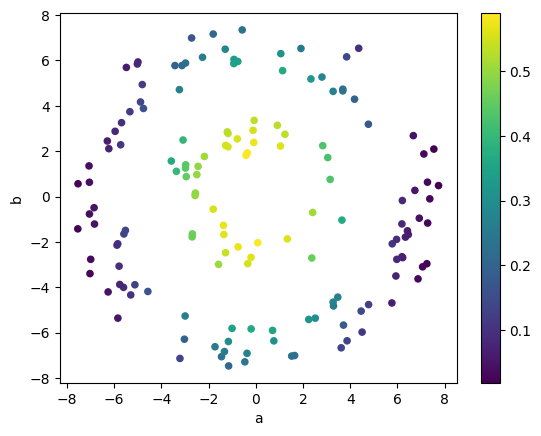

In [ ]:
# Apilamos X1, X2 y las predicciones para graficar
arry = np.stack((np.squeeze(np.concatenate(x_true))[:, 0], np.squeeze(np.concatenate(x_true))[:, 1], np.squeeze(np.concatenate(y_pred_bath))), axis=1)

# Convertimos a DataFrame para facilitar la visualización
df1 = pd.DataFrame(arry, columns=[['a','b','c']])

# Scatter plot con colores según predicción (valores continuos entre 0 y 1)
df1.plot.scatter(x='a', y='b', c=np.squeeze(np.concatenate(y_pred_bath)), cmap='viridis')

In [ ]:
import jax
import jax.numpy as jnp
import optax
from flax import linen as nn
from flax.training import train_state

class SimpleModel(nn.Module):
    @nn.compact
    def __call__(self, x):
        return nn.Dense(1)(x)

# R^2
def R_squared(y, y_pred):
    residual = jnp.sum((y - y_pred) ** 2)
    total = jnp.sum((y - jax.lax.stop_gradient(jnp.mean(y))) ** 2)  # Evita problemas con JIT
    return 1.0 - (residual / total)

# Función de pérdida
def mse_loss(params, state, batch):
    x, y = batch
    y_pred = state.apply_fn({'params': params}, x)
    loss = jnp.mean((y - y_pred) ** 2)
    return loss, y_pred

# entrenamiento
@jax.jit
def train_step(state, batch):
    def loss_fn(params):
        return mse_loss(params, state, batch)

    grad_fn = jax.value_and_grad(loss_fn, has_aux=True)
    (loss, y_pred), grads = grad_fn(state.params)
    state = state.apply_gradients(grads=grads)

    metrics = {
        'loss': loss,
        'mse': loss,
        'r2': R_squared(batch[1], y_pred)
    }
    return state, metrics

train_X = jnp.linspace(0, 10, 300).reshape(-1, 1)  # 300 puntos en X
train_Y = 2 * train_X + 1 + jax.random.normal(jax.random.PRNGKey(1), (300, 1)) * 0.5  # Añadiendo ruido
train_data_class = (train_X, train_Y)

# Inicializar modelo y optimizador
rng = jax.random.PRNGKey(0)
model = SimpleModel()
variables = model.init(rng, jnp.ones((1,)))  # Entrada escalar
params = variables['params']

tx = optax.sgd(learning_rate=0.01)
state = train_state.TrainState.create(
    apply_fn=model.apply,
    params=params,
    tx=tx,
)

for epoch in range(100):
    state, metrics = train_step(state, train_data_class)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {metrics['loss']:.4f}, MSE: {metrics['mse']:.4f}, R2: {metrics['r2']:.4f}")

print("Pesos entrenados:", state.params)


Epoch 10, Loss: 0.3280, MSE: 0.3280, R2: 0.9902
Epoch 20, Loss: 0.3224, MSE: 0.3224, R2: 0.9904
Epoch 30, Loss: 0.3174, MSE: 0.3174, R2: 0.9906
Epoch 40, Loss: 0.3129, MSE: 0.3129, R2: 0.9907
Epoch 50, Loss: 0.3088, MSE: 0.3088, R2: 0.9908
Epoch 60, Loss: 0.3050, MSE: 0.3050, R2: 0.9909
Epoch 70, Loss: 0.3017, MSE: 0.3017, R2: 0.9910
Epoch 80, Loss: 0.2986, MSE: 0.2986, R2: 0.9911
Epoch 90, Loss: 0.2958, MSE: 0.2958, R2: 0.9912
Epoch 100, Loss: 0.2933, MSE: 0.2933, R2: 0.9913
Pesos entrenados: {'Dense_0': {'bias': Array([0.7583396], dtype=float32), 'kernel': Array([[2.040151]], dtype=float32)}}


In [ ]:
train_data_class[0][1]

In [ ]:
data_train_ds = [x for i in range(len(train_data_class)) if i % 2 == 0]
data_train_label = [x for i in range(len(train_data_class)) if i % 2 != 0]

train_ds = (data_train_ds, data_train_label)
len(data_train_label)

1

In [ ]:

train_data_class[0]